# Linear Regression (Continued)

In [2]:
# Simple Linear Regression Example

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data=pd.read_csv('https://raw.githubusercontent.com/s4sauravv/Datasets/refs/heads/main/Advertising.csv')#Reading the data file
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


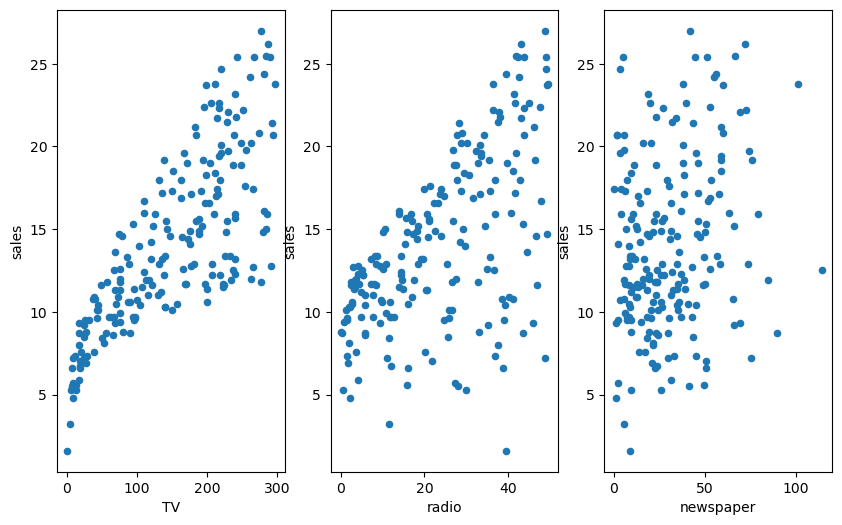

In [10]:
fig,axs=plt.subplots(1,3)
data.plot(kind='scatter',x='TV',y='sales',ax=axs[0],figsize=(10,6))
data.plot(kind='scatter',x='radio',y='sales',ax=axs[1])
data.plot(kind='scatter',x='newspaper',y='sales',ax=axs[2])
plt.show()

In [12]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

x=data[['TV']]
y=data.sales

lm.fit(x,y)
print(lm.intercept_)
print(lm.coef_)
lm.predict([[50]])

7.032593549127693
[0.04753664]


array([9.40942557])

#  How least Sqaures line changes based on input data - refer the below link

https://www.desmos.com/

# Model Confidence  

**Question:** How well does the model fit the data?  

One of the most common ways to check this for a linear model is by calculating the **R-squared** value.  
R-squared tells us the proportion of the variation in the observed data that the model can explain.  
It can also be seen as the **reduction in error** compared to a **null model**.  

A **null model** only predicts the mean of all observed responses and has only an intercept (no slope).  

- **R-squared value range:** 0 to 1  
- **Closer to 1 → Better fit** (means the model explains more of the data's variance)  

**Example:**  
If my model gives confidence levels like 80%, 82%, 85%, or 90%,  
I can understand how close my predictions are to the real values.  

If my model learns well, the confidence value will also increase when we make predictions.

# On What Basis Am I Saying My Model Is This Confident?  

From the past data, my model has learned patterns and relationships.  
The confidence level depends on **how well the model has learned or been trained**.  

This is where the **R² (R-squared) statistic** comes in.  
It measures how well the model explains the variation in the data, which directly relates to the model's confidence.

# R² (R-Squared) Statistic  

The **R-squared** statistic measures how well the model fits the data.  
It is the proportion of variance in the data that is explained by the model.  
Its value is always between **0 and 1**.  

**In simple words:**  
It shows how much of our data is explained by the model.  

**Example:**  
- R² = 0.75 → The model explains **75%** of the total dataset.  
- R² = 0 → The model explains **none** of the data points.  
- R² = 1 → The model explains **100%** of the data.
  
$R^2 = \frac{TSS - RSS}{TSS} = 1 - \frac{RSS}{TSS}$

![rs.png](rs.png)

Where RSS is the  Residual Sum of Sqaure or, RSS is the residual (error) term we have been talking about so far and TSS is the total sum of square

TSS is calculated when we consider the line passing through the mean value of y . to be the best fit line . Just Like RSS , we calculating the error term when the best fit line passing through the mean value of Y and we get the values of TSS .

TSS - Difference between actual and the mean is a total sum of square.

The closer the value of $ r^2 $  comes bellow 0 (which is a possibility) that means the model is so bad that it is performing even worse than the average best fit line.

# Adjusted R² Statistic  

The **Adjusted R²** is a metric used to evaluate how well a model fits the data.  

---

## Why Not Just Use R²?  

- R² values range between **0 and 1** (or 0% to 100%).  
- In multiple linear regression (with many features), adding more features often increases the R² score — even if those features have **no real relationship** with the target variable.  
- This can give a **false impression** that the model is improving.  

**Example:**  
If you have features `feature1`, `feature2`, `feature3`, and so on — adding extra features might increase R², but not always improve the model.  
We don’t want to take that chance.  

---

## Why Use Adjusted R²?  

- Adjusted R² **penalizes** the model for adding unnecessary features.  
- If a new feature does not help predict the target variable, adjusted R² will pull the score down.  
- This creates a more **balanced** evaluation.  

---

## Definition:  

The Adjusted R² is calculated as:  

\$[
\text{Adjusted } R^2 = 1 - \left( \frac{(1 - R^2)(N - 1)}{N - P - 1} \right)
\$]  

Where:  
- \$( R^2 \$) = Sample R-squared  
- \$( N \$) = Number of observations (rows)  
- \$( P \$) = Number of features (independent variables)  

---

**Key points:**  
- Adjusted R² will always be **less than or equal to** R².  
- It punishes adding extra features that do not improve the model.  

---

## Is There a "Good" R² Value?  

It depends on the **domain** of the data.  
There is no universal threshold — instead, R² and Adjusted R² are mainly used to **compare models** to see which one performs better.

This r2 the techniques that we used to evaluate (Evaluate Means - How Good it is , How Bad It is , How Well its Performing)the model.Technically we call as metrics.

- There are lots of metrics

all metrics are availabe in sklearn.metrics

In [20]:
from sklearn.metrics import r2_score

In [23]:
x.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [25]:
pridicted_sales =lm.predict(x)
pridicted_sales

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431,
       10.17476548, 17.23871025,  8.16396559, 11.66741599, 16.73482186,
       16.32125309, 10.25557777, 20.40940417, 10.32212907, 14.03474068,
       17.41459582, 18.31779199,  7.6600772 , 17.88520856,  9.99412625,
       19.52997632, 13.82557947, 18.44614092, 18.85970969, 10.38868036,
       20.95607553, 12.39948025, 11.653155  , 19.65832525, 11.58185004,
       20.85149492, 19.72012288, 10.58358059,  9.08142275, 17.87094757,
       16.65876324, 15.44657891, 20.98935118, 16.86792445,  8.22576322,
       15.35625929, 11.2966302 , 18.43663359, 17.83291826, 10.21279479,
       16.53041431, 11.80527225, 17.31952254, 15.71278409, 19.52046899,
       16.48763133,  7.37961102, 13.50708398, 17.05331735, 17.04856369,
        9.57580381, 19.45391769, 18.4081116 , 11.91460652, 13.26464711,
       10.31262174,  8.52999772, 13.65444756, 18.31779199, 17.33

In [27]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [29]:
r2_score(y_true=y,y_pred = pridicted_sales )

0.611875050850071

#  Multiple Linear Regression  -->

Till Now, we have created the model based on only one Feature now will include multiple feature and create a model to see the relatioship between those features and the label column . This is calles Multiple Linear Regression.

𝑦 = 𝛽0 + 𝛽1𝑥1+. . . +𝛽𝑛𝑥𝑛

Where 𝛽0 = intercept; 𝛽1 = coefficient of x1; 𝛽2 = coefficient of x2 and so on...
Each x represents a different feature and each feature has its own coefficient .

In this case:

𝑦 = 𝛽 +𝛽1 × 𝑇𝑉 + 𝛽2 × 𝑅𝑎𝑑𝑖𝑜 + 𝛽3 × 𝑁𝑒𝑤𝑠𝑝𝑎𝑝𝑒�

Lets use statsmodels to estimate the coefficients

In [32]:
data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [34]:
x= data[['TV','radio','newspaper']]
y=data.sales
lm=LinearRegression()
lm.fit(x,y)

LinearRegression()

In [36]:
#Print Intercept and coefficients

print("Intercept : -- > ", lm.intercept_)
print("TV : --> ",lm.coef_[0])
print("Radio : --> ",lm.coef_[1])
print("Newspaper : --> ",lm.coef_[2])

Intercept : -- >  2.9388893694594067
TV : -->  0.04576464545539761
Radio : -->  0.18853001691820462
Newspaper : -->  -0.0010374930424763159


# Understanding Coefficients  

A **coefficient** tells us how much the target variable will change if an independent variable increases by 1 unit, keeping other variables constant.  

In simple words:  
If you invest 1 extra unit, the coefficient tells you how much your sales will increase from the current level.  
This is connected to the idea of **correlation** — showing how strongly two variables are related.  

---

**Examples:**  
- **TV vs Sales** → There is a relationship (more TV investment = more sales).  
- **Radio vs Sales** → There is a relationship (more radio investment = more sales).  
- **Newspaper vs Sales** → No relationship (investing in newspaper ads does not increase sales).

# Feature Selection 

How do i decide which feature have to be included in a linear model ? Here one idea..

---> Check if the R-Squared goes up when you add new pedictors to the model.

In [42]:
x=data[['TV','radio']]
y=data.sales
lm.fit(x,y)

LinearRegression()

In [44]:
#check the 𝑅2 
predicted_sales =lm.predict(x)
r2_score(y,predicted_sales)

0.8971942610828956

In [48]:
#Lets do something for all features

x=data[['TV','radio','newspaper']]
y=data.sales

#Training 
lm.fit(x,y)

LinearRegression()

In [50]:
predicted_sales =lm.predict(x)
r2_score(y,predicted_sales)

0.8972106381789522

Selecting the model with the highest value of R squared is not a correct approach as the value of R-Squared shall always increase whenever a new feature is taken for consideration even if the feature is unrelated to the response.

The alternative is to use adjusted R-Squared which penalise the model complexity to control overfitting but this again generally under penalizes the complexity

A better approach to feature seletion is cross-validation. It Provide a more reliable way to choose which of the created models will best generalise as it better estimate of out of sample error. An advantage is that the cross validation methood can be applied to any machihe leanrning model and the scikit learn package provides extensive fucntionality for that.

# Multiple Linear Regression (Example)

| **x1 Product 1 Sales** | **x2 Product 2 Sales** | **Y Weekly Sales** |
|-------------------------|-------------------------|---------------------|
| 1                       | 4                       | 1                   |
| 2                       | 5                       | 6                   |
| 3                       | 8                       | 8                   |
| 4                       | 2                       | 12                  |

---

# Multiple Linear Regression

- In linear regression model we have one dependent and one independent variable.  

- Multiple regression model involves multiple predictors or independent variables and one dependent variable.  

- This is an extension of the linear regression problem.

**Note:** LS: Least Square method is used for simple linear regression and OLS: Ordinary Least Squares method is used for multiple linear regression

# Multiple Linear Regression Equation

- The multiple regression of two variables \(x_1\) and \(x_2\) is given as follows:  

\$[
y = f(x_1, x_2)
\$]  

\$[
y = a_0 + a_1x_1 + a_2x_2
\$]  

---

- In general, this is given for *n* independent variables as:  

\$[
y = f(x_1, x_2, \ldots, x_n)
\$]  

\$[
y = a_0 + a_1x_1 + a_2x_2 + \ldots + a_nx_n + \varepsilon
\$]  

---

- Here,  
  - \$(x_1, x_2, \ldots, x_n\$) are **predictor variables**  
  - \$(y\$) is the **dependent variable**  
  - \$((a_0, a_1, a_2, \ldots, a_n)\$) are the **coefficients** of the regression equation  
  - \$(\varepsilon\$) is the **error term**

# **Multiple Regression Using Matrix Approach**

- Apply multiple regression for the values given in the table where weekly sales along with sales for products \$(x_1\$) and \$(x_2\$) are provided.  

- Use **matrix approach** for finding multiple regression.  

---

## Data Table

| **x1 Product 1 Sales** | **x2 Product 2 Sales** | **Y Weekly Sales** |
|-------------------------|-------------------------|---------------------|
| 1                       | 4                       | 1                   |
| 2                       | 5                       | 6                   |
| 3                       | 8                       | 8                   |
| 4                       | 2                       | 12                  |

# **Matrix Representation of Multiple Regression**

- Here, the matrices for \(Y\) and \(X\) are given as follows:

\$[
X =
\begin{bmatrix}
1 & 1 & 4 \\
1 & 2 & 5 \\
1 & 3 & 8 \\
1 & 4 & 2
\end{bmatrix},
\quad
Y =
\begin{bmatrix}
1 \\
6 \\
8 \\
12
\end{bmatrix}
\$]

---

- The coefficient vector of the multiple regression equation is given as:

\$[
a =
\begin{bmatrix}
a_0 \\
a_1 \\
a_2
\end{bmatrix}
\$]

Where:
- \$(a_0\$) = intercept  
- \$(a_1, a_2\$) = regression coefficients for \$(x_1, x_2\$) respectively

# Regression Coefficient Calculation

- The regression coefficient for multiple regression is calculated the same way as linear regression:

$$
\hat{a} = \big((X^T X)^{-1} X^T \big) Y
$$

---

### Step: Compute $X^T X$

$$
X^T X =
\begin{bmatrix}
1 & 1 & 1 & 1 \\
1 & 2 & 3 & 4 \\
4 & 5 & 8 & 2
\end{bmatrix}
\begin{bmatrix}
1 & 1 & 4 \\
1 & 2 & 5 \\
1 & 3 & 8 \\
1 & 4 & 2
\end{bmatrix}
=
\begin{bmatrix}
4 & 10 & 19 \\
10 & 30 & 46 \\
19 & 46 & 109
\end{bmatrix}
$$


In [60]:
import numpy as np

# Given matrix
XTX = np.array([
    [4, 10, 19],
    [10, 30, 46],
    [19, 46, 109]
], dtype=float)

# Calculate inverse using numpy
XTX_inv = np.linalg.inv(XTX)      # linalg - lin: linear and alg: algebra
XTX_inv

array([[ 3.15300546, -0.59016393, -0.30054645],
       [-0.59016393,  0.20491803,  0.01639344],
       [-0.30054645,  0.01639344,  0.05464481]])

### Step: Compute \((X^T X)\)

\$[
X^T X = 
\begin{bmatrix}
4 & 10 & 19 \\
10 & 30 & 46 \\
19 & 46 & 109
\end{bmatrix}
\$]

---

### Step: Take the Inverse of \((X^T X)\)

\$[
(X^T X)^{-1} =
\begin{bmatrix}
3.15 & -0.59 & -0.30 \\
-0.59 & 0.20 & 0.016 \\
-0.30 & 0.016 & 0.054
\end{bmatrix}
\$]

---

So, using this inverse in the formula:

\$[
\hat{a} = \big( (X^T X)^{-1} X^T \big) Y
\$]

Where:
- \$(a_0\$) = intercept  
- \$(a_1, a_2\$) = regression coefficients for \$(x_1, x_2\$) respectively

### Step: Compute \$((X^T X)^{-1} X^T\$)

\$[
(X^T X)^{-1} X^T =
\begin{bmatrix}
3.15 & -0.59 & -0.30 \\
-0.59 & 0.20 & 0.016 \\
-0.30 & 0.016 & 0.054
\end{bmatrix}
\times
\begin{bmatrix}
1 & 1 & 1 & 1 \\
1 & 2 & 3 & 4 \\
4 & 5 & 8 & 2
\end{bmatrix}
\$]

---

### Result:

\$[
(X^T X)^{-1} X^T =
\begin{bmatrix}
0.05 & 0.47 & -1.02 & 0.19 \\
-0.32 & -0.098 & 0.155 & 0.26 \\
-0.065 & 0.005 & 0.185 & -0.125
\end{bmatrix}
\$]

### Final Step: Compute \$(\hat{a}\$)

We already have:

\$[
\hat{a} = \big((X^T X)^{-1} X^T \big) Y
\$]

Substitute the matrices:

\$[
\hat{a} =
\begin{bmatrix}
0.05 & 0.47 & -1.02 & 0.19 \\
-0.32 & -0.098 & 0.155 & 0.26 \\
-0.065 & 0.005 & 0.185 & -0.125
\end{bmatrix}
\times
\begin{bmatrix}
1 \\
6 \\
8 \\
12
\end{bmatrix}
\$]

---

### Result:

\$[
\hat{a} =
\begin{bmatrix}
-1.69 \\
3.48 \\
-0.05
\end{bmatrix}
\$]

---

### Interpretation:
- \$(a_0 = -1.69\$) (Intercept)  
- \$(a_1 = 3.48\$) (Coefficient for \$(x_1\$))  
- \$(a_2 = -0.05\$) (Coefficient for \$(x_2\$))  

### Final Regression Equation

From the calculation, we got:

\$[
a_0 = -1.69, \quad a_1 = 3.48, \quad a_2 = -0.05
\$]

---

### General Regression Model:

\$[
y = a_0 + a_1 x_1 + a_2 x_2
\$]

---

### Substituting Values:

\$[
y = -1.69 + 3.48x_1 - 0.05x_2
\$]

---

 This is the final multiple regression model.


# Problem Statement

We need to predict the chance of admission based on he student various scores .

--> __Feature or independent Variables

- GRE Score
- TOEFL Score
- SOP
- LOR
- CGPA
- Research

-->__Label/Target

- Chance of Admission

In [3]:
#Importing Necessary Libraries.
import pandas as pd
import numpy as np

#Importing Libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#Importing Libraries and Metrics from Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


#Importing to ignore warnings
import warnings
warnings.filterwarnings('ignore')

data=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/Admission_Prediction.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [72]:
data.shape

(500, 9)

In [74]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


If we observe count row, there are differences in count and it means there are null values.

In [77]:
# Fill Nan values

data['University Rating']=data['University Rating'].fillna(data['University Rating'].mode()[0])  # mode of first index written as mode()[0] if multiple mode value present
data['TOEFL Score']=data['TOEFL Score'].fillna(data['TOEFL Score'].mean())
data['GRE Score']=data['GRE Score'].fillna(data['GRE Score'].mean())

# Let's check after filling the null values
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [90]:
#Lets Delete the unwanted columns, example 'Serial No.' column doesn't contribute to the prediction calculation
data.drop(columns=['Serial No.'],inplace=True)

KeyError: "['Serial No.'] not found in axis"

In [92]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


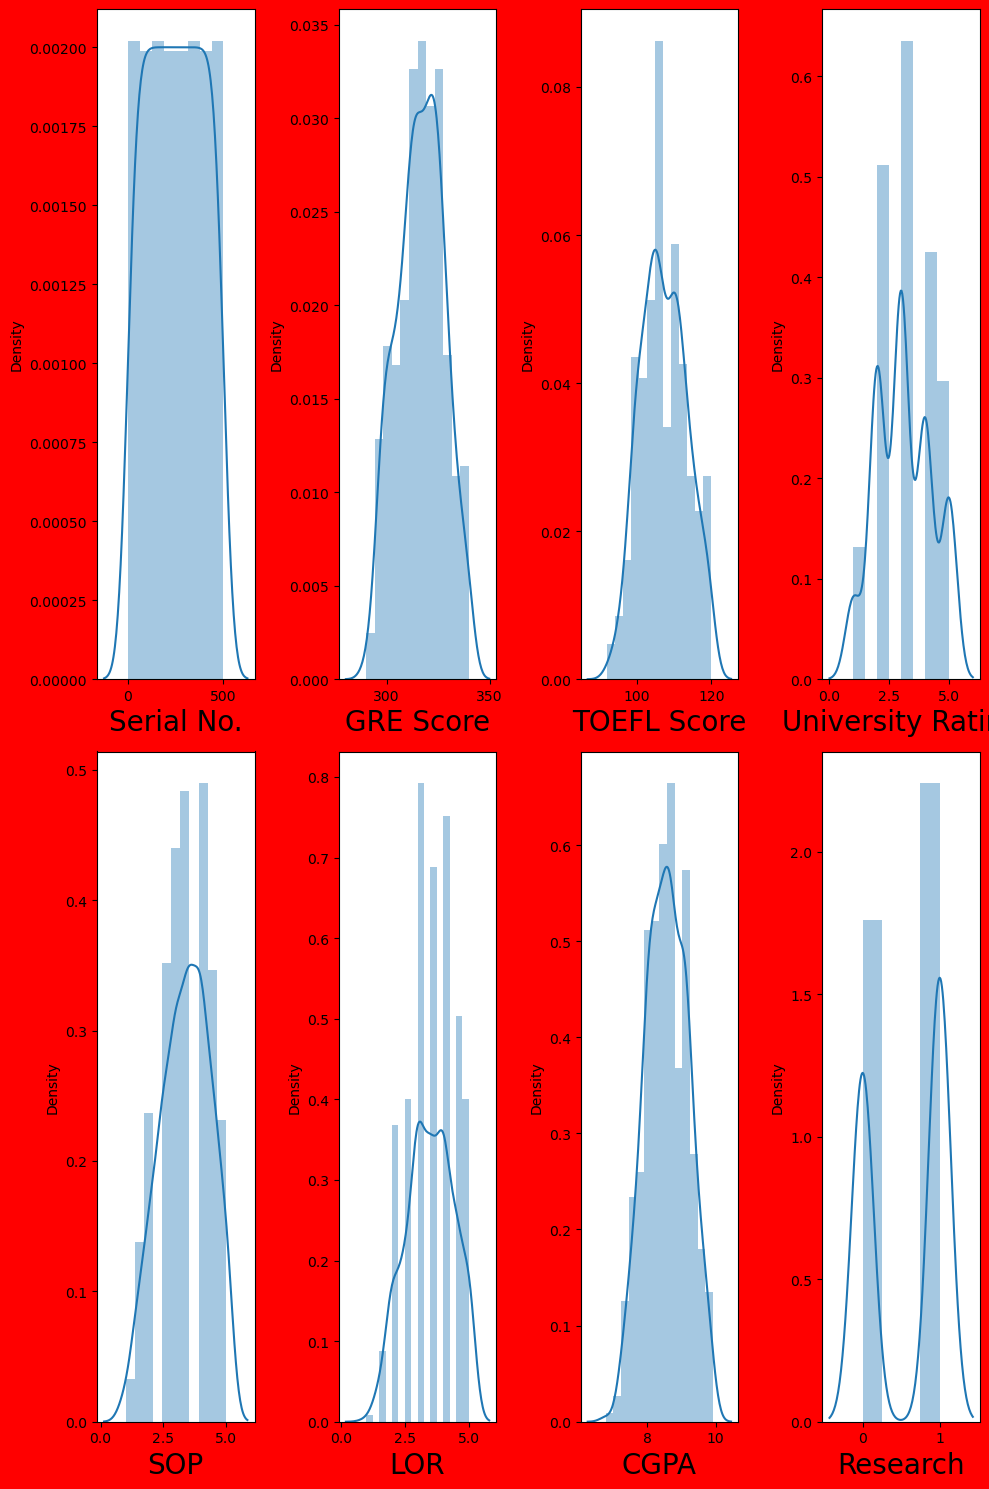

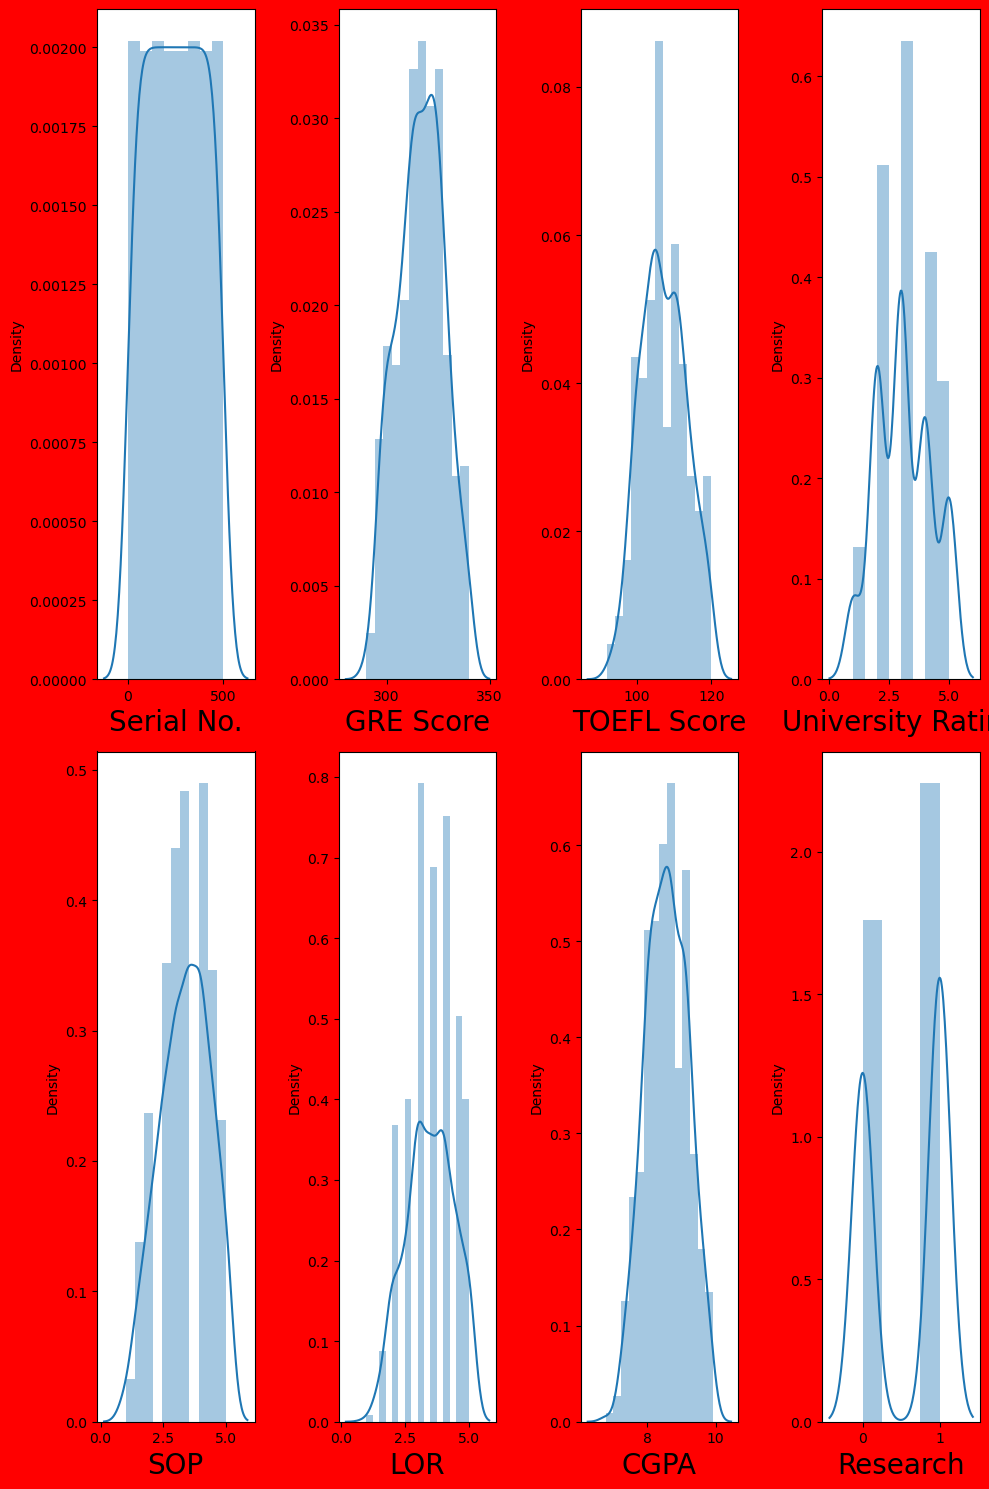

In [7]:
plt.figure(figsize=(10,15),facecolor='red')
plotnumber=1
for column in data:
    if plotnumber <=8:
        axs=plt.subplot(2,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.tight_layout()
plt.show()